# Academic Performance

In [41]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [42]:
df=pd.read_csv('Academic-Performance.csv')
display(df)

,student_id,gender,age,grade,ethnicity,math_score,english_score,science_score,history_score
0,1,Male,15,10,African American,85.0,78.0,82.0,88.0
1,2,Female,16,11,Asian,90.0,85.0,88.0,92.0
2,3,Male,15,10,Hispanic,75.0,80.0,78.0,76.0
3,4,Female,16,11,Caucasian,92.0,88.0,90.0,94.0
4,5,Female,17,12,Asian,88.0,NaN,85.0,89.0
...,...,...,...,...,...,...,...,...,...
95,96,Female,15,10,African American,83.0,79.0,81.0,85.0
96,97,Male,17,12,Asian,89.0,91.0,86.0,NaN
97,98,Female,16,11,Caucasian,81.0,76.0,79.0,83.0
98,99,Male,15,10,Hispanic,73.0,NaN,71.0,69.0


## Whether Null values present or not:

In [44]:
df.isnull().values.any()

True

## Total number of null values in each column:

In [45]:
df.isnull().sum()

student_id       0
gender           0
age              0
grade            0
ethnicity        0
math_score       6
english_score    7
science_score    7
history_score    3
dtype: int64

## Replacing null values in "math_score" column by median:

In [46]:
df['math_score'].isnull().values.any()

True

In [47]:
median1 = df['math_score'].median()
df['math_score'].fillna(median1, inplace = True)
df['math_score'].isnull().values.any()

False

## Replacing null values in "English_score" column by median:

In [48]:
df['english_score'].isnull().values.any()

True

In [49]:
median2 = df['english_score'].median()
df['english_score'].fillna(median2, inplace = True)
df['english_score'].isnull().values.any()

False

## Replacing null values in "science_score" column using interpolate function:

In [50]:
df['science_score'] = df['science_score'].interpolate()
df['science_score'].isnull().values.any()

False

## Droping rows with missing values:

In [51]:
df.dropna(subset = ['history_score']).isnull().sum()

student_id       0
gender           0
age              0
grade            0
ethnicity        0
math_score       0
english_score    0
science_score    0
history_score    0
dtype: int64

## Outliers using Boxplot and Scatterplot:

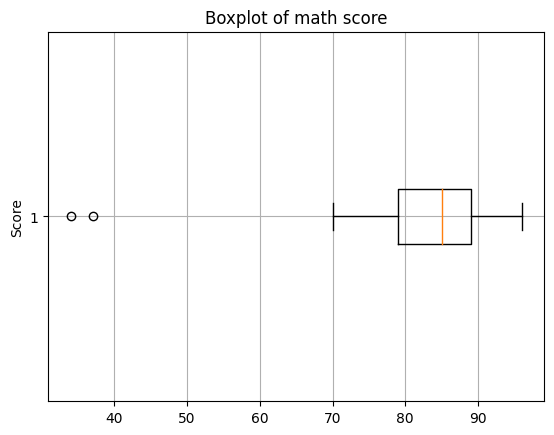

In [53]:
df_cleaned = df.dropna(subset=['math_score'])
plt.boxplot(df_cleaned['math_score'], vert =
False)
plt.title('Boxplot of math score')
plt.ylabel('Score')
plt.grid(True)
plt.show()

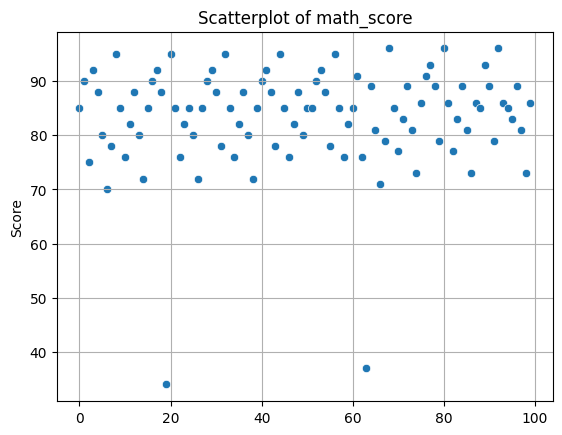

In [54]:
df_cleaned = df.dropna(subset=['math_score'])
sn.scatterplot(df_cleaned['math_score'])
plt.title('Scatterplot of math_score')
plt.ylabel('Score')
plt.grid(True)
plt.show()

## Replacing values outside the calculated range with the mean

In [55]:
df_cleaned = df.dropna(subset=['math_score'])
Q1 = df_cleaned['math_score'].quantile(0.25)
Q3 = df_cleaned['math_score'].quantile(0.75)
IQR = Q3 - Q1
l_range = Q1 - (1.5 * IQR)
r_range = Q3 + (1.5 * IQR)
print("Left range:", l_range)
print("Right range:", r_range)
mean = df_cleaned['math_score'].mean()
df.loc[(df['math_score'] > r_range) &
(df['math_score'] < l_range), 'math_score'] = mean

Left range: 64.0
Right range: 104.0


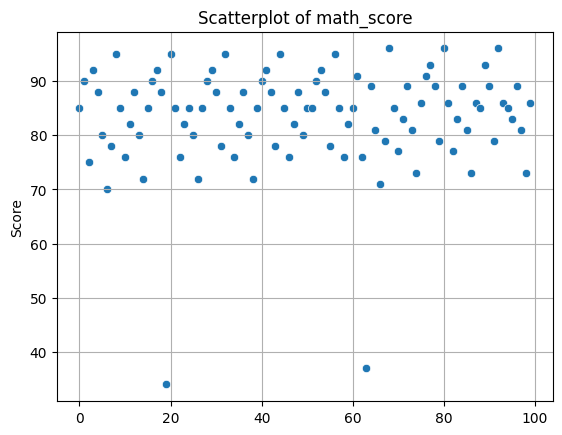

In [57]:
df_cleaned = df.dropna(subset=['math_score'])
sn.scatterplot(df_cleaned['math_score'])
plt.title('Scatterplot of math_score')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   student_id     100 non-null    int64  
 1   gender         100 non-null    object 
 2   age            100 non-null    int64  
 3   grade          100 non-null    int64  
 4   ethnicity      100 non-null    object 
 5   math_score     100 non-null    float64
 6   english_score  100 non-null    float64
 7   science_score  100 non-null    float64
 8   history_score  97 non-null     float64
dtypes: float64(4), int64(3), object(2)
memory usage: 7.2+ KB


## Data Transformation:

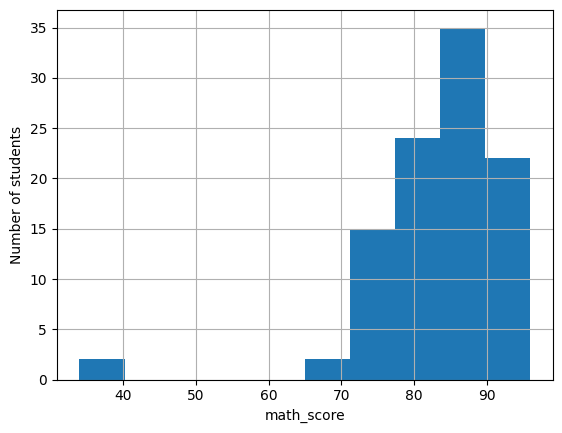

In [59]:
df['math_score'].hist()
plt.xlabel('math_score')
plt.ylabel('Number of students')
plt.show()